# **1. 단항 논리 회귀(Logistic Regression) 실습**
- 분류를 할 때 사용하며 선형 회귀 공식으로부터 나왔기 때문에 논리 회귀라는 이름이 붙여짐

<img src='https://i.imgur.com/nE29yVL.png' width = 600>

> 직선 하나(선형 회귀)를 사용해서 분류를 예측한다면 제대로 예측하지 못할 경우가 많음

<img src='https://i.imgur.com/guvMfkf.png' width = 600>

> sigmoid 함수를 사용하여 정확도를 높일 수 있음

### 1-1. 시그모이드(Sigmoid) 함수
- 예측값을 0에서 1사이의 값이 되도록 만듦
- 0에서 1사이의 연속된 값을 출력으로 하기 때문에 보통 0.5를 기준으로 구분

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(49)

In [78]:
X_train = torch.FloatTensor([[0], [1], [3], [5], [9], [11], [15], [20]])
y_train = torch.FloatTensor([[0], [0], [0], [0], [0], [1], [1], [1]]) # 이진 분류

print(X_train.shape)
print(y_train.shape)

torch.Size([8, 1])
torch.Size([8, 1])


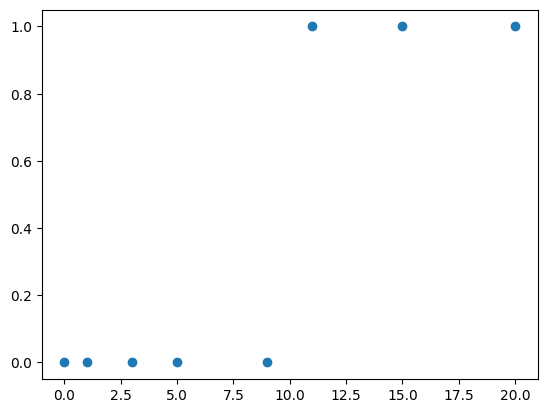

In [79]:
plt.scatter(X_train, y_train)

![](https://i.imgur.com/6NsfKMa.png)

In [80]:
model = nn.Sequential(
    nn.Linear(1, 1), # Wx + b 가 그대로 들어간다.
    nn.Sigmoid() # 대신 0과 1 사이로만 나오게하라!
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [81]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.9062]], requires_grad=True), Parameter containing:
tensor([-0.4466], requires_grad=True)]


### 1-2. 비용 함수
- 논리 회귀에서는 nn.BCELoss() 함수를 사용하여 Loss를 계산
- Binary Cross Entropy

<img src = 'https://i.imgur.com/tvCuEmh.png' width = '600'>

In [82]:
y_pred = model(X_train)
y_pred

tensor([[3.9018e-01],
        [2.0542e-01],
        [4.0498e-02],
        [6.8436e-03],
        [1.8364e-04],
        [2.9986e-05],
        [7.9927e-07],
        [8.6081e-09]], grad_fn=<SigmoidBackward0>)

In [83]:
loss = nn.BCELoss()(y_pred, y_train)
loss

tensor(5.4747, grad_fn=<BinaryCrossEntropyBackward0>)

In [84]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [85]:
epochs = 3000

for epoch in range(epochs + 1):
  y_pred = model(X_train)
  loss = nn.BCELoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}/{epochs} Loss : {loss : .4f}')

Epoch: 0/3000 Loss :  5.4747
Epoch: 100/3000 Loss :  0.5013
Epoch: 200/3000 Loss :  0.4638
Epoch: 300/3000 Loss :  0.4323
Epoch: 400/3000 Loss :  0.4056
Epoch: 500/3000 Loss :  0.3828
Epoch: 600/3000 Loss :  0.3632
Epoch: 700/3000 Loss :  0.3461
Epoch: 800/3000 Loss :  0.3312
Epoch: 900/3000 Loss :  0.3181
Epoch: 1000/3000 Loss :  0.3064
Epoch: 1100/3000 Loss :  0.2959
Epoch: 1200/3000 Loss :  0.2866
Epoch: 1300/3000 Loss :  0.2781
Epoch: 1400/3000 Loss :  0.2704
Epoch: 1500/3000 Loss :  0.2634
Epoch: 1600/3000 Loss :  0.2570
Epoch: 1700/3000 Loss :  0.2511
Epoch: 1800/3000 Loss :  0.2456
Epoch: 1900/3000 Loss :  0.2406
Epoch: 2000/3000 Loss :  0.2359
Epoch: 2100/3000 Loss :  0.2315
Epoch: 2200/3000 Loss :  0.2274
Epoch: 2300/3000 Loss :  0.2236
Epoch: 2400/3000 Loss :  0.2200
Epoch: 2500/3000 Loss :  0.2166
Epoch: 2600/3000 Loss :  0.2134
Epoch: 2700/3000 Loss :  0.2104
Epoch: 2800/3000 Loss :  0.2076
Epoch: 2900/3000 Loss :  0.2049
Epoch: 3000/3000 Loss :  0.2023


In [86]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.3591]], requires_grad=True), Parameter containing:
tensor([-3.2739], requires_grad=True)]


In [87]:
# 테스트
X_test = torch.FloatTensor([12])
y_pred = model(X_test)
print(y_pred)

tensor([0.7379], grad_fn=<SigmoidBackward0>)


In [88]:
# 임계치 설정
# 0.5보다 크거나 같으면 1
# 0.5보다 작으면 0

y_bool = (y_pred >= 0.5).float()
print(y_bool)

tensor([1.])


# **2. 다항 논리 회귀 실습**

In [89]:
X_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]

y_train = [0, 0, 0, 1, 1, 1, 2, 2]

X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
print(X_train)
print(y_train)

tensor([[1., 2., 1., 1.],
        [2., 1., 3., 2.],
        [3., 1., 3., 4.],
        [4., 1., 5., 5.],
        [1., 7., 5., 5.],
        [1., 2., 5., 6.],
        [1., 6., 6., 6.],
        [1., 7., 7., 7.]])
tensor([0, 0, 0, 1, 1, 1, 2, 2])


In [90]:
model = nn.Sequential(
    nn.Linear(4, 3) # 다항일 땐 클래스의 갯수가 와야한다.
    # 시그모이드를 보면 0~1 사이의 값이 나왔다.
    # 다항에서는 소프트맥스 함수를 써야하는데, 정규분포식의 값이 나온다.
    # 3개로 값이 나오게 되는데 그 중 가장 큰 녀석으로 고른다!
    # BCE는 로스값만 구하는 용도였다면
    # CrossEntropyLoss 에 소프트맥스 함수가 포함!
)

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)


In [91]:
# 옵티마이저 하기 전!
y_pred = model(X_train)
print(y_pred)

tensor([[ 0.8308,  0.2073, -1.9407],
        [-0.3453,  1.2375, -3.1398],
        [-0.1590,  1.3386, -3.7706],
        [-0.9084,  2.1020, -5.2282],
        [ 2.4085,  1.2498, -5.6465],
        [ 0.4941,  2.7591, -4.4807],
        [ 1.8428,  2.1108, -5.9914],
        [ 2.1305,  2.4381, -6.8532]], grad_fn=<AddmmBackward0>)


In [92]:
# 다항 논리 회귀에서는 BCELoss() 대신 CrossEntropyLoss()를 사용
loss = nn.CrossEntropyLoss()(y_pred, y_train)
print(loss)

tensor(3.0058, grad_fn=<NllLossBackward0>)


In [93]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [94]:
epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(X_train)
  loss = nn.CrossEntropyLoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}/{epochs} Loss : {loss : .4f}')

Epoch: 0/1000 Loss :  3.0058
Epoch: 100/1000 Loss :  0.6349
Epoch: 200/1000 Loss :  0.5553
Epoch: 300/1000 Loss :  0.5020
Epoch: 400/1000 Loss :  0.4583
Epoch: 500/1000 Loss :  0.4192
Epoch: 600/1000 Loss :  0.3825
Epoch: 700/1000 Loss :  0.3467
Epoch: 800/1000 Loss :  0.3106
Epoch: 900/1000 Loss :  0.2741
Epoch: 1000/1000 Loss :  0.2446


In [95]:
X_test = torch.FloatTensor([[3, 2, 5, 6]])
y_pred = model(X_test)
print(y_pred)

tensor([[-1.1491,  2.9809, -4.8177]], grad_fn=<AddmmBackward0>)


In [96]:
# 예측값과 확률 구하기
y_prob = nn.Softmax(1)(y_pred) # 1 : 어디에서 확률을 구할건지 설정
y_prob

tensor([[1.5822e-02, 9.8377e-01, 4.0363e-04]], grad_fn=<SoftmaxBackward0>)

In [97]:
print(f'0일 확률 : {y_prob[0][0] : .2f}')
print(f'1일 확률 : {y_prob[0][1] : .2f}')
print(f'2일 확률 : {y_prob[0][2] : .2f}')

0일 확률 :  0.02
1일 확률 :  0.98
2일 확률 :  0.00


In [98]:
# 열에 해당하는 값의 가장 높은 값!
torch.argmax(y_prob, axis = 1)

tensor([1])

# **3. 경사 하강법의 종류**

### 3-1. 배치 경사 하강법
- 가장 기본적인 경사 하강법(Vanilla Gradient Descent)
- 데이터셋 전체를 고려하여 손실함수를 계산
- 한 번의 Epoch에 모든 파라미터 업데이트를 단 한번만 수행
- Batch의 개수와 Iteration은 1이고 Batch size는 전체 데이터의 개수
- 파라미터 업데이트할 때 한 번에 전체 데이터셋을 고려하기 때문에 모델 학습시 많은 시간과 메모리가 필요하다는 단점

### 3-2. 확률적 경사 하강법
- 확률적 경사 하강법(Stochastic Gradient Descent)은 배치 경사 하강법이 모델 학습 시 많은 시간과 메모리가 필요하다는 단점을 개선하기 위해 제안된 기법
- Batch Size를 1로 설정하여 파라미터를 업데이트 하기 때문에 배치 경사 하강법보다 훨씬 빠르고 적은 메모리로 학습이 진행
- 파라미터 값의 업데이트 폭이 불안정하기 때문에 정확도가 낮은 경우가 생길 수 있음

### 3-3. 미니 배치 경사 하강법
- 미니 배치 경사 하강법(Mini-Batch Gradient Descent)은 Batch Size를 설정한 size로 사용
- 배치 경사 하강법보다 모델 학습 속도가 빠르고, 확률적 경사 하강법보다 안정적인 장점이 있음
- 딥러닝 분야에서 많이 활용되는 경사 하강법
- 일반적으로 Batch Size를 16, 32, 64, 128과 같이 2의 n제곱에 해당하는 값으로 사용하는게 보편적

# **4. 경사 하강법의 여러가지 알고리즘**

### 4-1. 확률적 경사 하강법(SGD)
- 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법

### 4-2. 모멘텀(Momentum)
- 관성이라는 물리학의 법칙을 응용한 방법
- 경사 하강법에 관성을 더 해줌
- 접선의 기울기에 한 시점 이전의 접선의 기울기값을 일정한 비율만큼 반영

### 4-3. 아다그라드(Adagrad)
- 모든 매개변수에 동일한 학습율(learning rate)를 적용하는 것은 비효율적이라는 생각에서 만들어진 학습 방법
- 처음에는 크게 학습하다가 조금씩 작게 학습시킴


### 4-4. 아담(Adam)
- 모멘텀 + 아다그라드



### 4-5. AdamW
- Adam Optimizer의 변형
- Adam의 일부 약점(가중치 감쇠)과 성능 향상을 위해 고안

# **5. 와인 품종 예측해보기**
- sklearn.datasets.load_wine : 이탈리아의 같은 지역에서 재배된 세 가지 다른 품종으로 만든 와인을 화학적으로 분석한 결과에 대한 데이터셋

In [99]:
from sklearn.datasets import load_wine

In [100]:
X_data, y_data = load_wine(return_X_y = True, as_frame = True)

In [101]:
X_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [102]:
y_data.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### 5-1. 문제
- 13개의 성분을 분석하여 어떤 와인인지 맞춰보는 딥러닝 모델을 구축해보자.
- 단, 데이터를 섞은 후 train 데이터를 80%, test 데이터를 20%로 하여 테스트 데이터의 0번 인덱스가 어떤 와인인지 출력하고 정확도도 출력해보자. (Adam을 사용)



In [103]:
X_data = torch.FloatTensor(X_data.values)
y_data = torch.LongTensor(y_data.values)

print(X_data.shape)
print(y_data.shape)

torch.Size([178, 13])
torch.Size([178])


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=49)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([142, 13]) torch.Size([142])
torch.Size([36, 13]) torch.Size([36])


In [106]:
model = nn.Sequential(
    nn.Linear(13, 3)
)

# Adam
optimizer = optim.Adam(model.parameters(), lr = 0.01)

epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(X_train)
  loss = nn.CrossEntropyLoss()(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    y_prob = nn.Softmax(1)(y_pred)
    y_pred_index = torch.argmax(y_prob, axis = 1)
    y_train_index = y_train

    accuracy = (y_train_index == y_pred_index).float().sum() / len(y_train) * 100

    print(f'Epoch: {epoch}/{epochs} Loss : {loss : .4f} Accuracy:{accuracy:.2f}%')

Epoch: 0/1000 Loss :  48.6361 Accuracy:34.51%
Epoch: 100/1000 Loss :  0.4225 Accuracy:86.62%
Epoch: 200/1000 Loss :  0.2146 Accuracy:91.55%
Epoch: 300/1000 Loss :  0.1637 Accuracy:92.96%
Epoch: 400/1000 Loss :  0.1374 Accuracy:95.07%
Epoch: 500/1000 Loss :  0.1215 Accuracy:96.48%
Epoch: 600/1000 Loss :  0.1105 Accuracy:97.18%
Epoch: 700/1000 Loss :  0.1022 Accuracy:97.18%
Epoch: 800/1000 Loss :  0.0954 Accuracy:97.18%
Epoch: 900/1000 Loss :  0.0897 Accuracy:97.89%
Epoch: 1000/1000 Loss :  0.0847 Accuracy:98.59%


In [107]:
y_pred = model(X_test)
y_pred[:5]

tensor([[ -69.6061,  -66.5639,  -65.9562],
        [ -44.4941,  -36.0845,  -42.3372],
        [ -99.7045, -102.0391, -103.9215],
        [ -89.9290,  -87.2732,  -91.0713],
        [ -66.6408,  -60.2383,  -64.7489]], grad_fn=<SliceBackward0>)

In [108]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[:5]

tensor([[1.6550e-02, 3.4676e-01, 6.3669e-01],
        [2.2225e-04, 9.9786e-01, 1.9212e-03],
        [8.9962e-01, 8.7120e-02, 1.3262e-02],
        [6.4285e-02, 9.1520e-01, 2.0513e-02],
        [1.6368e-03, 9.8751e-01, 1.0855e-02]], grad_fn=<SliceBackward0>)

In [109]:
# 0번째 인덱스에 해당하는 친구의 와인 종류 확인
print(f'0번 품종일 확률: {y_prob[2][0]:.2f}')
print(f'1번 품종일 확률: {y_prob[2][1]:.2f}')
print(f'2번 품종일 확률: {y_prob[2][2]:.2f}')

0번 품종일 확률: 0.90
1번 품종일 확률: 0.09
2번 품종일 확률: 0.01


In [111]:
y_pred_index = torch.argmax(y_prob, axis = 1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100

print(f'테스트 데이터의 예측 정확도는 {accuracy:.2f}% 입니다!!')

테스트 데이터의 예측 정확도는 97.22% 입니다!!
